In [368]:
import numpy as np
import matplotlib.pyplot as plt

In [369]:
plt.style.use("default")

In [370]:
L =  10  # string length
T = 1
N = 100
Dx = L / (N+1)

Dx

0.09900990099009901

In [371]:
def calculate_u(rho: np.ndarray, omega: float) -> np.ndarray:
    u = np.zeros(N+2)
    u[0] = 0
    u[1] = 1

    for i in range(1, N+1):
        u[i+1] = -(Dx**2) * rho[i]*(omega**2)*u[i]/T - u[i-1] + 2*u[i]

    return u

lbd_u_N = lambda omega: calculate_u(rho, omega)[-1]

In [372]:
def find_all_roots_of_u_N(step: float, w_range: float) -> list[float]:
    assert step < w_range

    def find_root(w1: float, w2: float) -> float:
        assert lbd_u_N(w1) * lbd_u_N(w2) < 0, "There is no root between x1 and x2, or the range is too large"

        epsilon = 1e-8

        while True:
            m = (w1 + w2) / 2

            if lbd_u_N(w1)*lbd_u_N(m) < 0:
                w2 = m
            elif lbd_u_N(w2)*lbd_u_N(m) < 0:
                w1 = m

            if abs(w1 - w2) < epsilon:
                return w1

    roots: list[float] = []

    w1 = omega_min
    while w1 < omega_max - w_range:
        w2 = w1 + w_range
        if lbd_u_N(w1)*lbd_u_N(w2) < 0:
            roots.append(find_root(w1, w2))
            w1 = w2

        w1 += step

    return roots


roots for rho=1:
0.31414659738540657
0.6282172131538393
0.942135882377625
1.255826673507691

roots for rho=1 + 40(x-L/2)^2:
0.025305009841918955
0.03511825752258303
0.06453856468200686
0.07449183082580571


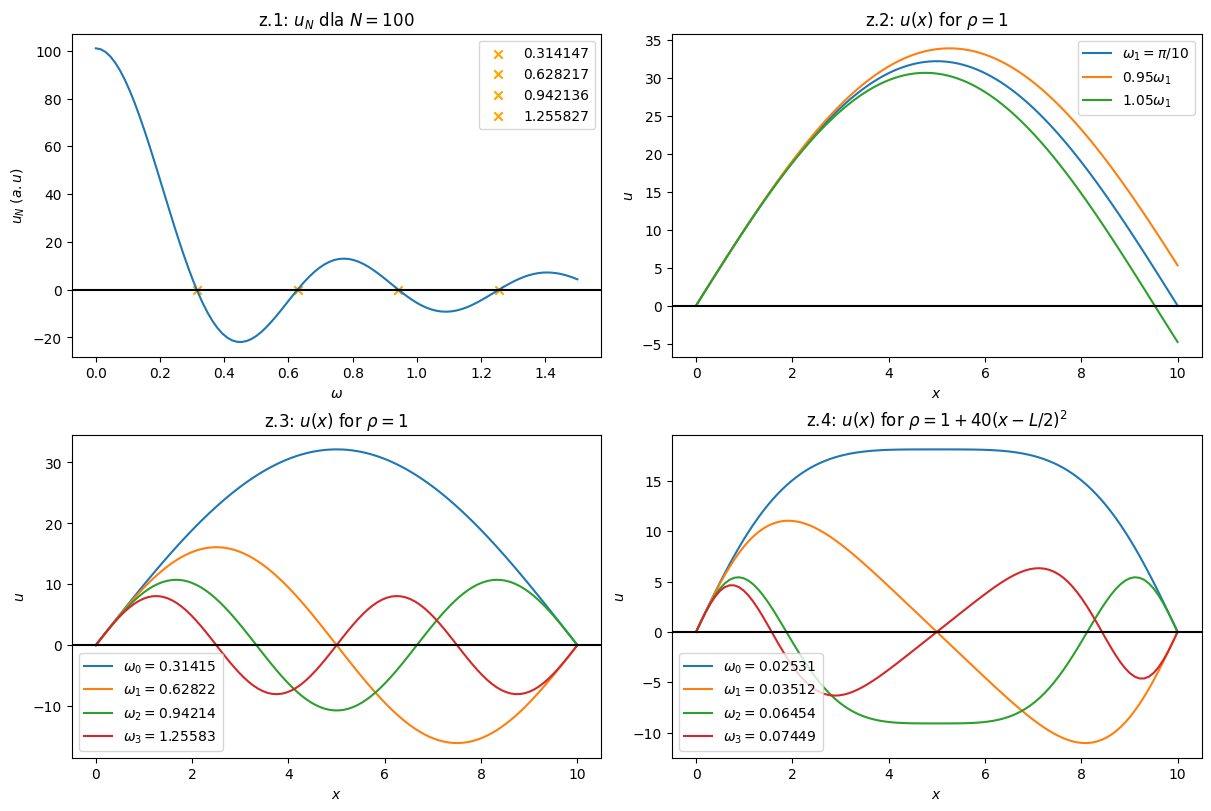

In [373]:
x = np.linspace(0, L, N+2)

steps = 100
omega_min = 0.0
omega_max = 1.5
omega_linspace = np.linspace(omega_min, omega_max, steps)

rho = np.zeros(N+2)
rho[:] = 1

u_N = np.zeros(steps)

for i, omega in enumerate(omega_linspace):
    u_N[i] = lbd_u_N(omega)

# roots = [
#     find_root(0.2, 0.4),
#     find_root(0.5, 0.8),
#     find_root(0.85, 1.1),
#     find_root(1.2, 1.4),
# ]
roots = find_all_roots_of_u_N(0.01, 0.1)

print("roots for rho=1:", *roots, sep="\n")

_, axs = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axs = axs.flatten()

axs[0].plot(omega_linspace, u_N)
for root in roots:
    axs[0].scatter(root, 0, marker="x", label=f"{root:.6f}", color="orange")
axs[0].axhline(0, color='k')
axs[0].legend()
axs[0].set_xlabel("$\omega$")
axs[0].set_ylabel("$u_N \ (a.u)$")
axs[0].set_title("z.1: $u_N$ dla $N=100$")

omega = np.pi/10
axs[1].plot(x, calculate_u(rho, omega), label="$\omega_1=\pi/10$")
axs[1].plot(x, calculate_u(rho, omega * 0.95), label="$0.95 \omega_1$")
axs[1].plot(x, calculate_u(rho, omega * 1.05), label="$1.05 \omega_1$")
axs[1].axhline(0, color='k')
axs[1].legend()
axs[1].set_xlabel("$x$")
axs[1].set_ylabel("$u$")
axs[1].set_title("z.2: $u(x)$ for $\\rho=1$")


for i, omega in enumerate(roots):
    axs[2].plot(x, calculate_u(rho, omega), label=f"$\omega_{i}={omega:.5f}$")
axs[2].axhline(0, color='k')
axs[2].legend()
axs[2].set_xlabel("$x$")
axs[2].set_ylabel("$u$")
axs[2].set_title("z.3: $u(x)$ for $\\rho=1$")

# ex4
alpha = 40
rho = 1 + alpha * (x - L/2)**2

omega_min = 0.0
omega_max = 0.1
omega_linspace = np.linspace(omega_min, omega_max, steps)

for i, omega in enumerate(omega_linspace):
    u_N[i] = lbd_u_N(omega)

roots = find_all_roots_of_u_N(0.001, 0.01)
print("\nroots for rho=1 + 40(x-L/2)^2:", *roots, sep="\n")

for i, omega in enumerate(roots):
    axs[3].plot(x, calculate_u(rho, omega), label=f"$\omega_{i}={omega:.5f}$")
axs[3].axhline(0, color='k')
axs[3].legend()
axs[3].set_xlabel("$x$")
axs[3].set_ylabel("$u$")
axs[3].set_title("z.4: $u(x)$ for $\\rho=1+40(x-L/2)^2$")

plt.show()

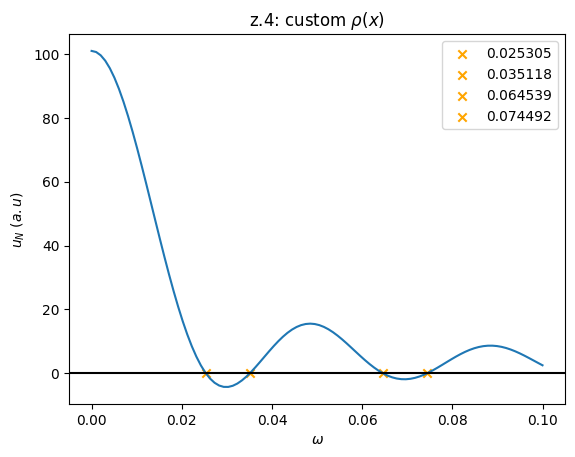

In [374]:
# ex 4 plot u_N (omega)

alpha = 40
rho = 1 + alpha * (x - L/2)**2

omega_min = 0.0
omega_max = 0.1
omega_linspace = np.linspace(omega_min, omega_max, steps)

for i, omega in enumerate(omega_linspace):
    u_N[i] = lbd_u_N(omega)

roots = find_all_roots_of_u_N(0.001, 0.01)

plt.plot(omega_linspace, u_N)
for root in roots:
    plt.scatter(root, 0, marker="x", label=f"{root:.6f}", color="orange")
plt.axhline(0, color='k')
plt.legend()
plt.xlabel("$\omega$")
plt.ylabel("$u_N \ (a.u)$")
plt.title("z.4: custom $\\rho(x)$")
plt.show()